In [23]:
import pandas as pd

train_csv = pd.read_csv('/kaggle/input/happy-whale-and-dolphin/train.csv')
train_csv.head()

,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392


In [24]:
!ls "/kaggle/input/happy-whale-and-dolphin"

sample_submission.csv  test_images  train.csv  train_images


In [25]:
import os
import random
import cv2
import matplotlib.pyplot as plt

def plot_three_samples(class_name):
    print("Samples images for " + class_name)
    base_path = '/kaggle/input/happy-whale-and-dolphin/train_images'
    paths = [os.path.join(base_path, img) for img in random.choices(train_csv[train_csv.species == class_name]["image"].values, k=3)]
    #print(paths)
    plt.figure(figsize=(16,16))
    imgs = random.sample(paths, 3)
    plt.subplot(131)
    plt.imshow(cv2.imread(imgs[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(imgs[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(imgs[2]))
    plt.show()

Samples images for melon_headed_whale


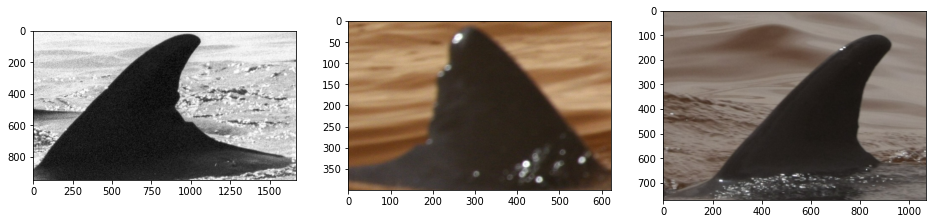

Samples images for humpback_whale


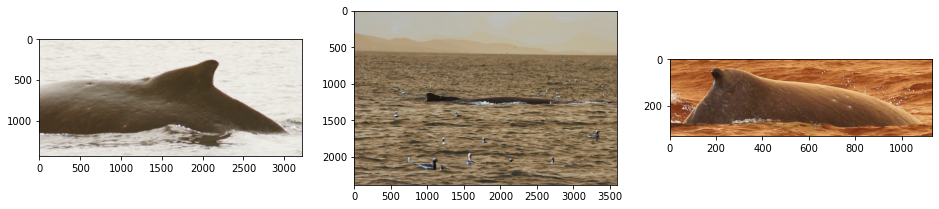

Samples images for false_killer_whale


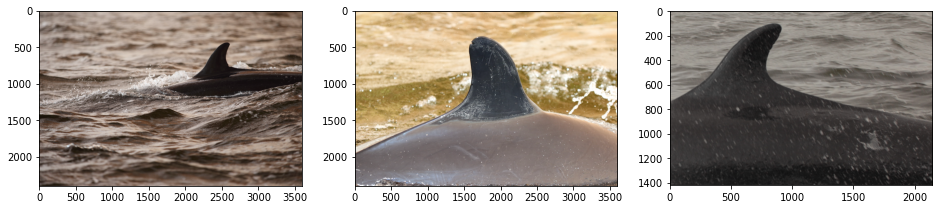

Samples images for bottlenose_dolphin


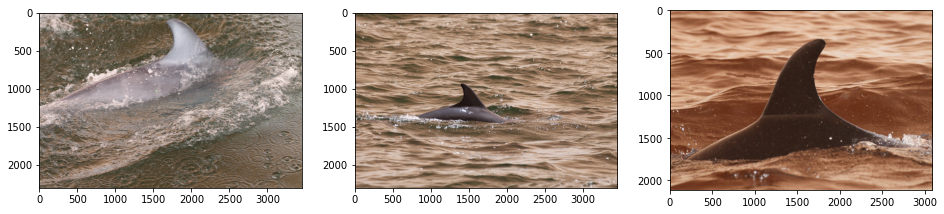

Samples images for beluga


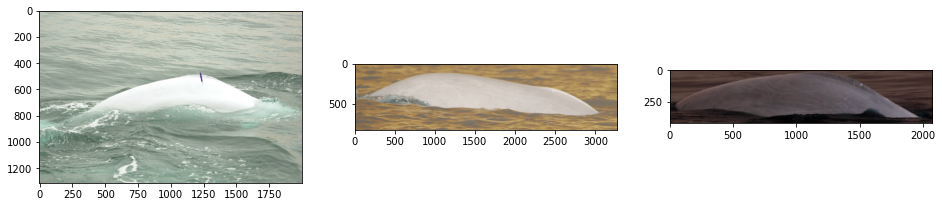

In [26]:
for class_name in train_csv['species'].unique()[:5]:
    plot_three_samples(class_name)

In [27]:
train_csv['species'].nunique()

30

In [28]:
train_csv['species'].unique()

array(['melon_headed_whale', 'humpback_whale', 'false_killer_whale',
       'bottlenose_dolphin', 'beluga', 'minke_whale', 'fin_whale',
       'blue_whale', 'gray_whale', 'southern_right_whale',
       'common_dolphin', 'kiler_whale', 'pilot_whale', 'dusky_dolphin',
       'killer_whale', 'long_finned_pilot_whale', 'sei_whale',
       'spinner_dolphin', 'bottlenose_dolpin', 'cuviers_beaked_whale',
       'spotted_dolphin', 'globis', 'brydes_whale', 'commersons_dolphin',
       'white_sided_dolphin', 'short_finned_pilot_whale',
       'rough_toothed_dolphin', 'pantropic_spotted_dolphin',
       'pygmy_killer_whale', 'frasiers_dolphin'], dtype=object)

In [29]:
train_csv["image"] = train_csv["image"].apply(lambda x: "../input/happy-whale-and-dolphin/train_images/"+x)

In [30]:
train_csv['species'].value_counts()

bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   1123
bottlenose_dolpin            1117
kiler_whale                   962
southern_right_whale          866
spotted_dolphin               490
sei_whale                     428
short_finned_pilot_whale      367
common_dolphin                347
cuviers_beaked_whale          341
pilot_whale                   262
long_finned_pilot_whale       238
white_sided_dolphin           229
brydes_whale                  154
pantropic_spotted_dolphin     145
globis                        116
commersons_dolphin             90
pygmy_killer_whale             76
rough_toothed_dolphin          60
frasiers_dolph

In [31]:
num_samples = 300

samples = []
for i in train_csv['species'].unique():
    x = train_csv.query('species == @i')
    try:
        samples.append(x.sample(num_samples, random_state = 1))
    except:
        samples.append(x.sample(train_csv[train_csv.species == i].shape[0], random_state = 1))
train_csv = pd.concat(samples, axis = 0).sample(frac = 1.0, random_state = 1).reset_index()

In [32]:
train_csv['species'].value_counts()

gray_whale                   300
melon_headed_whale           300
beluga                       300
cuviers_beaked_whale         300
killer_whale                 300
false_killer_whale           300
kiler_whale                  300
short_finned_pilot_whale     300
bottlenose_dolpin            300
dusky_dolphin                300
common_dolphin               300
spotted_dolphin              300
humpback_whale               300
spinner_dolphin              300
blue_whale                   300
bottlenose_dolphin           300
sei_whale                    300
fin_whale                    300
southern_right_whale         300
minke_whale                  300
pilot_whale                  262
long_finned_pilot_whale      238
white_sided_dolphin          229
brydes_whale                 154
pantropic_spotted_dolphin    145
globis                       116
commersons_dolphin            90
pygmy_killer_whale            76
rough_toothed_dolphin         60
frasiers_dolphin              14
Name: spec

In [39]:
train_csv['species'].value_counts().values.sum()

7384

In [33]:
train_csv

,index,image,species,individual_id
0,8903,../input/happy-whale-and-dolphin/train_images/...,pantropic_spotted_dolphin,68eb317f156c
1,17317,../input/happy-whale-and-dolphin/train_images/...,pilot_whale,187d3f8b831d
2,25642,../input/happy-whale-and-dolphin/train_images/...,minke_whale,2e0b381d3467
3,1536,../input/happy-whale-and-dolphin/train_images/...,pilot_whale,bf418ba70c65
4,23964,../input/happy-whale-and-dolphin/train_images/...,southern_right_whale,027cb7b5e11f
...,...,...,...,...
7379,39005,../input/happy-whale-and-dolphin/train_images/...,bottlenose_dolphin,9e89f8e28807
7380,947,../input/happy-whale-and-dolphin/train_images/...,spinner_dolphin,94b676b9f70f
7381,564,../input/happy-whale-and-dolphin/train_images/...,dusky_dolphin,fb767312ed1a
7382,18032,../input/happy-whale-and-dolphin/train_images/...,melon_headed_whale,89689259db1e


In [34]:
! mkdir sample_images

In [35]:
for img_path in train_csv["image"]:
    os.system(f"cp {img_path} sample_images")

In [37]:
!ls sample_images | wc

   7384    7384  140296


In [40]:
!zip -r sample_images.zip sample_images

  adding: sample_images/ (stored 0%)
  adding: sample_images/15f54f8ce5b65f.jpg (deflated 0%)
  adding: sample_images/3d6aa5ff5fe460.jpg (deflated 1%)
  adding: sample_images/7949fb65a288d2.jpg (deflated 0%)
  adding: sample_images/1d6effc03ef545.jpg (deflated 0%)
  adding: sample_images/db6a6ed1829de1.jpg (deflated 1%)
  adding: sample_images/bdeb8c8f255180.jpg (deflated 0%)
  adding: sample_images/283a4fd221df83.jpg (deflated 0%)
  adding: sample_images/1dcf042b6d6f8a.jpg (deflated 0%)
  adding: sample_images/05c06df13b9c0c.jpg (deflated 0%)
  adding: sample_images/82b89b25974140.jpg (deflated 2%)
  adding: sample_images/129a57246230e3.jpg (deflated 0%)
  adding: sample_images/f624407ea08aaa.jpg (deflated 0%)
  adding: sample_images/515aa4451e8952.jpg (deflated 0%)
  adding: sample_images/26bac0a71a88a1.jpg (deflated 0%)
  adding: sample_images/d0bf112196ae0c.jpg (deflated 0%)
  adding: sample_images/265498602ce726.jpg (deflated 0%)
  adding: sample_images/2397a2a8ed3509.jpg (deflate

In [41]:
!zip -r train.zip "/kaggle/input/happy-whale-and-dolphin/train.csv"

  adding: kaggle/input/happy-whale-and-dolphin/train.csv (deflated 64%)


In [ ]:
from sklearn.model_selection import train_test_split

train_df , test_df = train_test_split(train_csv, test_size = 0.30, shuffle = True, random_state = 0)
train_df

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rotation_range=0.45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0,
    validation_split=0.2,
)
test_gen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_image = train_gen.flow_from_dataframe(
    dataframe = train_df,
    x_col = 'image',
    y_col = 'species',
    target_size = (224, 224),
    color_mode ='rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed = 42,
    subset = 'training')

test_image = test_gen.flow_from_dataframe(
    dataframe = test_df,
    x_col = 'image',
    y_col = 'species',
    target_size = (224, 224),
    color_mode ='rgb',
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False)

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

In [ ]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

In [ ]:
tf.test.is_gpu_available()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential([
        Conv2D(64, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)),
        MaxPooling2D((3, 3)),

        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((3, 3)),

        Flatten(),
        Dense(30, activation="softmax")

    ])
    
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

with tf.device('/gpu:0'):
    #model.fit(...)
    history = model.fit(
    train_image,
    epochs = 100,
    callbacks = [EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)]
)